In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision

In [109]:
from torchvision.transforms import ToTensor
train_ds = torchvision.datasets.FashionMNIST('data',train = True,transform=ToTensor(),download=True)
test_ds = torchvision.datasets.FashionMNIST('data',train = False,transform=ToTensor(),download=True)

In [110]:
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=64,shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds,batch_size=64,shuffle=True)

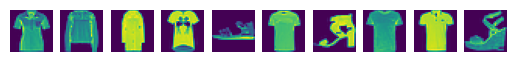

In [111]:
imgs,labels = next(iter(test_dl))
for i,img in enumerate(imgs[:10]): 
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.subplot(1,10,i+1)
    plt.imshow(npimg)
    plt.axis('off')

In [112]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1 = nn.Linear(28*28,200)
        self.Linear2 = nn.Linear(200,100)
        self.Linear3 = nn.Linear(100,10)
    def forward(self,input):
        x = input.view(-1,28*28)
        x = torch.relu(self.Linear1(x))
        x = torch.relu(self.Linear2(x))
        logits = self.Linear3(x)
        return logits
        

In [117]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Model().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.001)

In [120]:
def train(train_dl,loss_fn,opt,model):
    train_loss,train_acc = 0,0
    num = len(train_dl.dataset)
    batch_size = len(train_dl)
    for x,y in train_dl:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        with torch.no_grad():
            train_loss += loss.item()
            train_acc += (y_pred.argmax(1) == y).type(torch.float).sum().item() 

    acc = train_acc / num
    loss = train_loss / batch_size
    return acc,loss

In [121]:
def test(test_dl,loss_fn,opt,model):
    test_loss,test_acc = 0,0
    num = len(test_dl.dataset)
    batch_size = len(test_dl)
    with torch.no_grad():
        for x,y in test_dl:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred,y)
            test_loss += loss.item()
            test_acc += (y_pred.argmax(1) == y).type(torch.float).sum().item() 
    acc = train_acc / num
    loss = train_loss / batch_size
    return acc,loss

In [ ]:
epoches = 50
train_loss = []
test_loss = []
train_acc = []
test_acc = []
for epoch in range(epoches):
    t_acc,t_loss = train(train_dl,loss_fn,opt,model)
    train_loss.append(t_loss)
    train_acc.append(t_acc)
    te_acc,te_loss = train(test_dl,loss_fn,opt,model)
    test_loss.append(te_loss)
    test_acc.append(te_acc)
    template = ("epoch:{:2d}, train_Loss:{:.5f}, train_acc:{:.1f},test_Loss:{:.5f}, test_acc:{:.1f}")
    print(template.format(epoch, t_loss, t_acc*100, te_loss, te_acc*100))
print('Done')

epoch: 0, train_Loss:0.53582, train_acc:81.0,test_Loss:0.43235, test_acc:84.3
epoch: 1, train_Loss:0.37515, train_acc:86.3,test_Loss:0.37757, test_acc:86.2
epoch: 2, train_Loss:0.33225, train_acc:87.7,test_Loss:0.34539, test_acc:87.2
epoch: 3, train_Loss:0.31139, train_acc:88.5,test_Loss:0.32945, test_acc:87.7
epoch: 4, train_Loss:0.29097, train_acc:89.2,test_Loss:0.30997, test_acc:88.6
epoch: 5, train_Loss:0.27620, train_acc:89.7,test_Loss:0.29925, test_acc:88.9
epoch: 6, train_Loss:0.26226, train_acc:90.1,test_Loss:0.27997, test_acc:89.4
epoch: 7, train_Loss:0.25304, train_acc:90.4,test_Loss:0.26533, test_acc:90.1
epoch: 8, train_Loss:0.24167, train_acc:90.9,test_Loss:0.25723, test_acc:90.6
epoch: 9, train_Loss:0.23197, train_acc:91.2,test_Loss:0.24092, test_acc:91.3
epoch:10, train_Loss:0.22174, train_acc:91.5,test_Loss:0.23993, test_acc:91.0
epoch:11, train_Loss:0.21481, train_acc:91.9,test_Loss:0.22588, test_acc:91.5
epoch:12, train_Loss:0.20651, train_acc:92.2,test_Loss:0.21947, 